In [1]:
from pathlib import Path
import datetime as dt
import random as rd
import matplotlib.pyplot as plt
import numpy as np
import pdb

import astropy.units as u

from pyipn import copy_template, Universe
from pyipn.detector import Detector
from pyipn.grb import GRB
from pyipn.geometry import Pointing
from pyipn.io.orbits.tle import position_skyfield
import pyipn.cc

In [2]:
tle_G = 'GLAST2018-01-01 00:00:00--2018-12-31 00:00:00_tle.txt'
tle_I = 'INTEGRAL2018-01-01 00:00:00--2018-12-31 00:00:00_tle.txt'
date = dt.datetime(2018, 5, 1)

integral = Detector.from_GCRS(position_skyfield(date, tle_I),
                              Pointing(rd.random()*360, (rd.random()-0.5)*180),
                              'INTEGRAL')
glast = Detector.from_GCRS(position_skyfield(date, tle_G),
                           Pointing(rd.random()*360, (rd.random()-0.5)*180),
                           'GLAST')

grb = GRB(80., -30., 100. * u.Mpc, 1000., 2., 5.)

[0.37835197 0.        ]


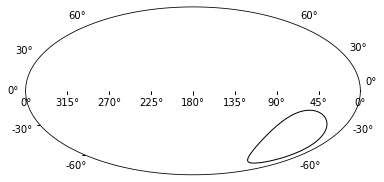

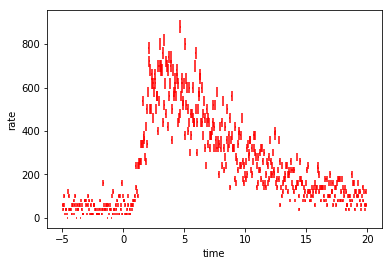

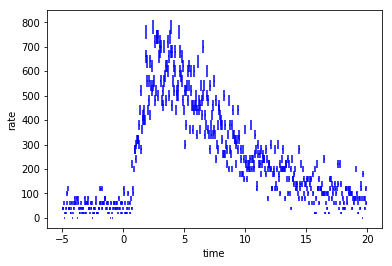

In [3]:
uni = Universe(grb)

uni.register_detector(integral)
uni.register_detector(glast)

uni.explode_grb(tstart=-50,tstop=100)
print(uni._T0)
uni.plot_annulus('INTEGRAL', 'GLAST')

uni.light_curves['INTEGRAL'].display(-5,20,.05,color='red')
uni.light_curves['GLAST'].display(-5,20,.05,color='blue')

xyzI=integral.location.get_cartesian_coord().xyz.value

xyzG=glast.location.get_cartesian_coord().xyz.value

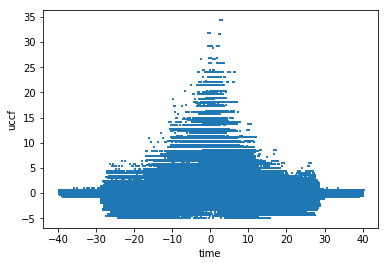

In [9]:
delta_t=0.01
tstart=-10
tstop=30
rate1, edges1 = uni.light_curves['INTEGRAL'].get_binned_light_curve(tstart,tstop,delta_t)
rate2, edges2 = uni.light_curves['GLAST'].get_binned_light_curve(tstart,tstop,delta_t)
lc1 = np.vstack((rate1, edges1[:-1]))
lc2 = np.vstack((rate2, edges2[:-1]))

uccf, lags = pyipn.cc.uccf(lc1, lc2)

plt.scatter(lags, uccf, marker=',', s=1)
plt.xlabel('time')
plt.ylabel('uccf')
#plt.figure(dpi=300)
plt.show()

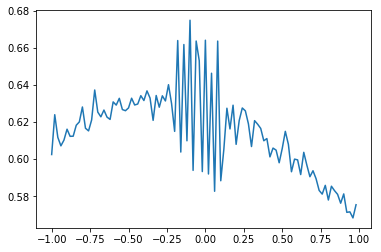

-0.0999999999999992


In [13]:
minimum = -1.
maximum = 1.
timediff = .02

bins = np.arange(minimum, maximum, timediff)
dcf = []
for i in bins:
    dcf.append(np.mean(uccf[np.where((lags >= i) & (lags < (i+timediff)))]))
dcf = np.array(dcf)

plt.plot(bins, dcf)
plt.show()

print(bins[np.argmax(dcf)])